In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [8]:
N = 1e5

all_features = "v0_ks_mass v0_ks_massErr pv0_x pv0_y pv0_z a0xy a0 a0z cosTheta v0_chi2 \
v0_x v0_y v0_z v0_rxy v0_rxyErr v0_px v0_py v0_pz v0_pt v0_p \
v0_ptErr \
v0_px1 v0_py1 v0_pz1 v0_pt1 \
v0_p1 v0_px2 v0_py2 v0_pz2 v0_pt2 v0_p2 v0_phi1 v0_theta1 \
v0_qOverP1 v0_phi2 v0_theta2 v0_qOverP2 alpha calpha epsilon1 \
epsilon2 Alpha pL1 pL2 pT thetastar rapidity_ks pseudorapidity".split(" ")

path = "data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
file = uproot.open(path)
data = file['tree'].pandas.df(all_features, entrystop = N)

data = data.loc[(data.v0_ks_mass > 400) & (data.v0_ks_mass < 600)]
# train_test_slice = int(len(data)*0.7)
# train_data = data[:train_test_slice]
# test_data = data[train_test_slice:]

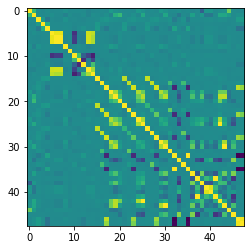

In [29]:
plt.imshow(data.corr())

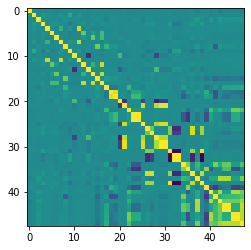

In [28]:
plt.imshow(data[data.corr().abs().sum().sort_values().index].corr())

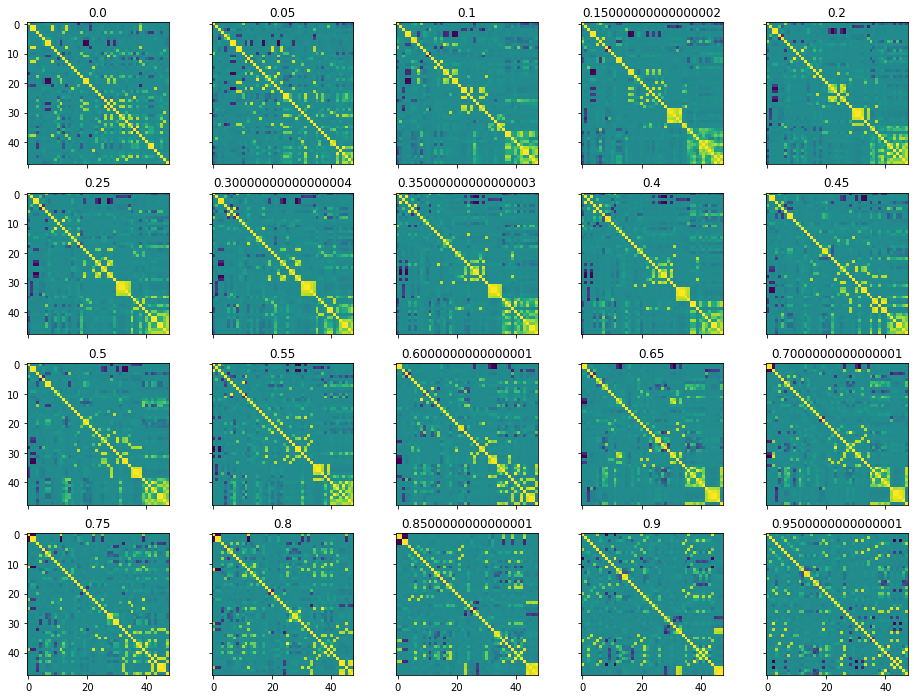

In [119]:
ranges = np.arange(0,1,0.05)
fig, ax = plt.subplots(figsize=(16,3*np.ceil(len(ranges)/5).astype(int)),nrows=np.ceil(len(ranges)/5).astype(int),ncols=5,sharex=True,sharey=True)
ax = ax.flatten()
for i, cut in enumerate(ranges):
    a = np.zeros((len(data.columns),len(data.columns)))
    a[data.corr() > cut] = 1
    a[data.corr() < - cut] = -1

    ax[i].imshow(data[data.columns[np.argsort(a.sum(axis=0))]].corr())
    ax[i].set_title(f'{cut}')

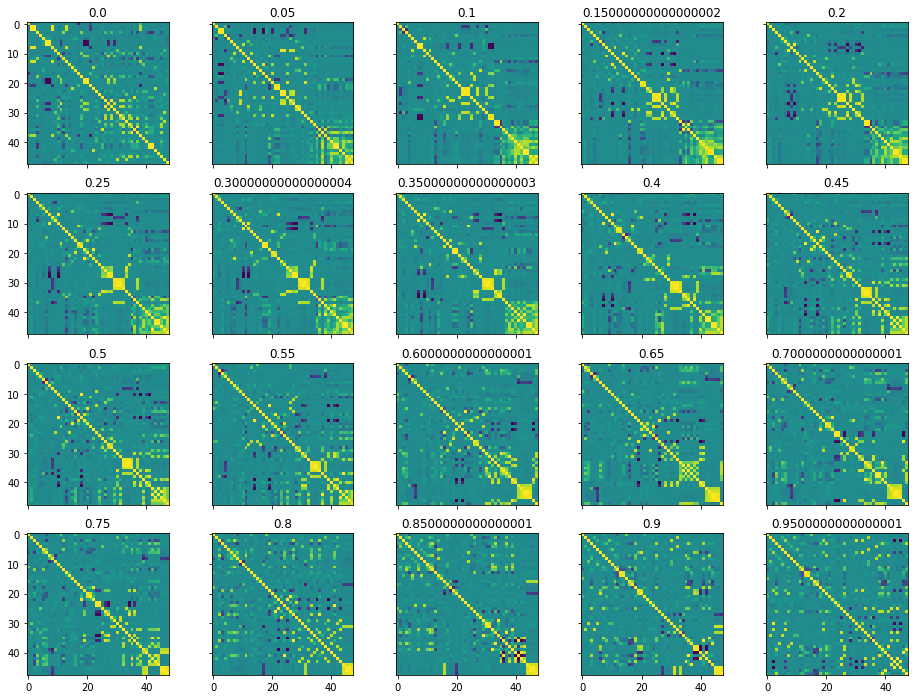

In [120]:
ranges = np.arange(0,1,0.05)
fig, ax = plt.subplots(figsize=(16,3*np.ceil(len(ranges)/5).astype(int)),nrows=np.ceil(len(ranges)/5).astype(int),ncols=5,sharex=True,sharey=True)
ax = ax.flatten()
for i, cut in enumerate(ranges):
    a = np.zeros((len(data.columns),len(data.columns)))
    a[data.corr() > cut] = 1
#     a[data.corr() < - cut] = -1

    ax[i].imshow(data[data.columns[np.argsort(a.sum(axis=0))]].corr())
    ax[i].set_title(f'{cut}')

In [66]:
from scipy.spatial import distance_matrix

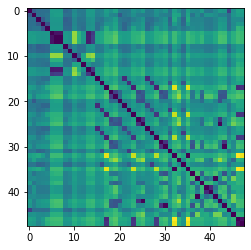

In [70]:
plt.imshow(distance_matrix(data.corr(),data.corr()))

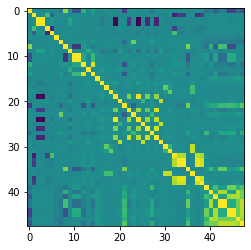

In [30]:
plt.imshow(data[data.corr().sum().sort_values().index].corr())